In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import periodogram, welch
import wave
from scipy.io import wavfile
from scipy.signal import wiener

In [2]:
sound_files = ['data/noise1.wav', 'data/noise2.wav', 'data/noise3.wav']

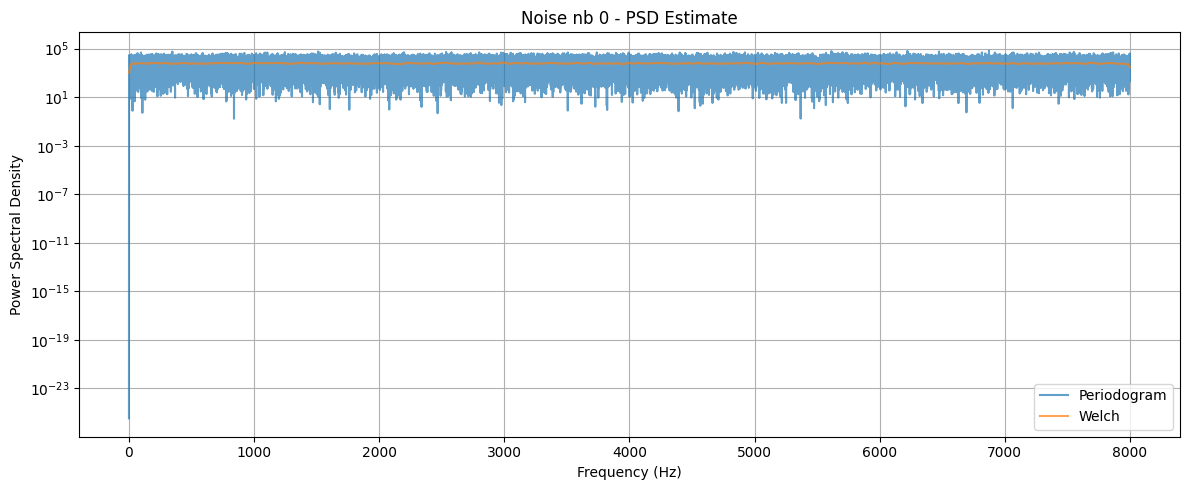

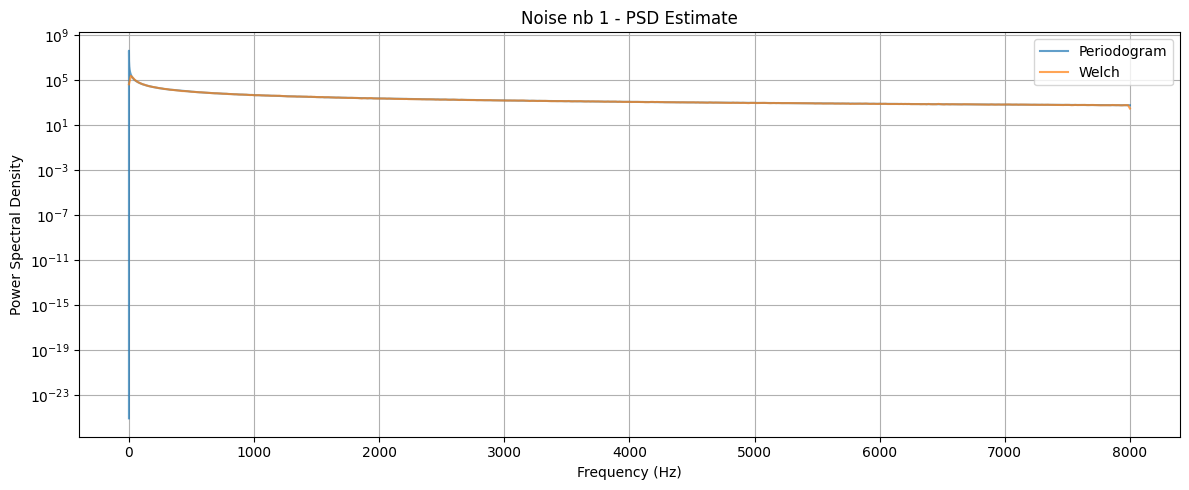

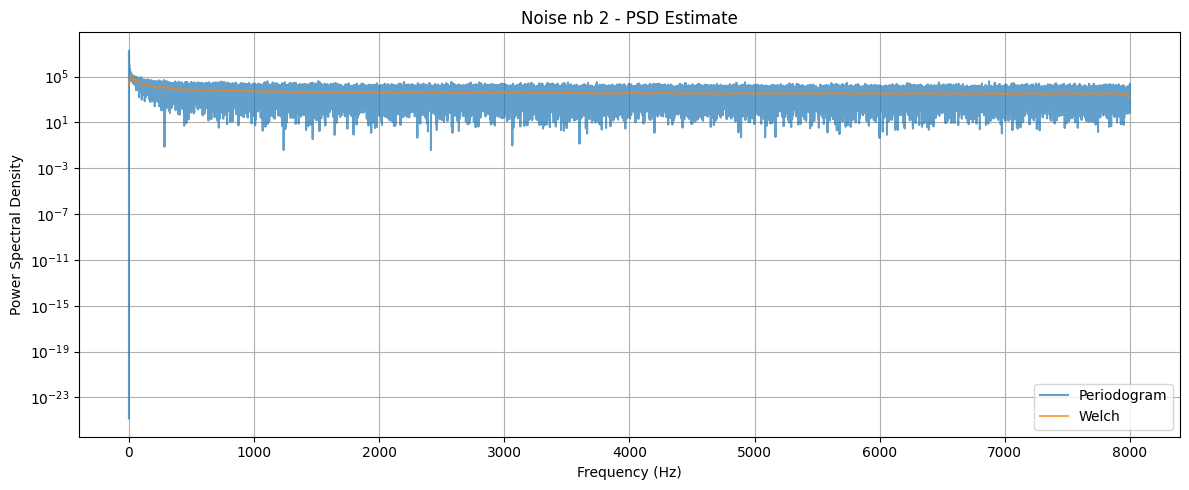

In [3]:
for i, sound_file in enumerate(sound_files):
    fs, x = wavfile.read(sound_file)
    # Periodogram
    f1, Pxx1 = periodogram(x, fs=fs, scaling='density')

    # Welch method
    f2, Pxx2 = welch(x, fs=fs, nperseg=1024, scaling='density')

    # Plot
    plt.figure(figsize=(12, 5))
    plt.semilogy(f1, Pxx1, label='Periodogram', alpha=0.7)
    plt.semilogy(f2, Pxx2, label='Welch', alpha=0.7)
    plt.title(f"Noise nb {i} - PSD Estimate")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

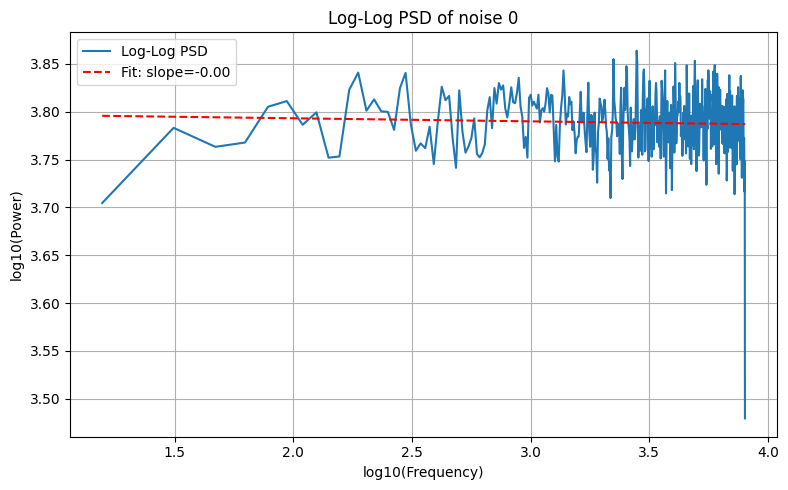

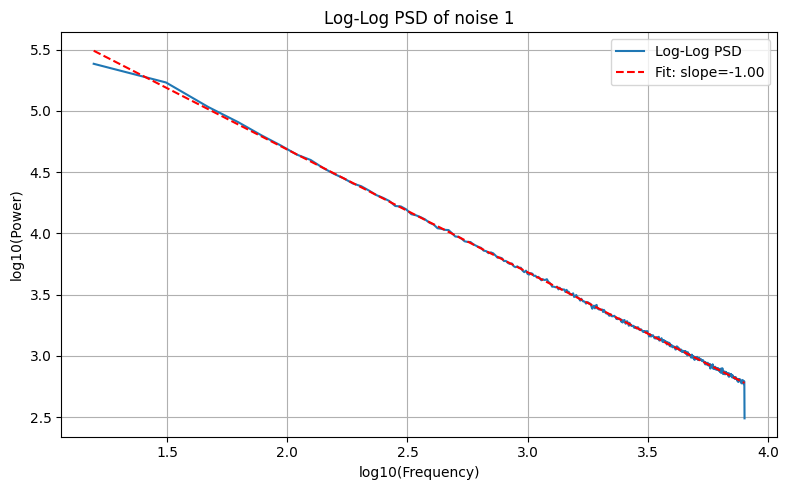

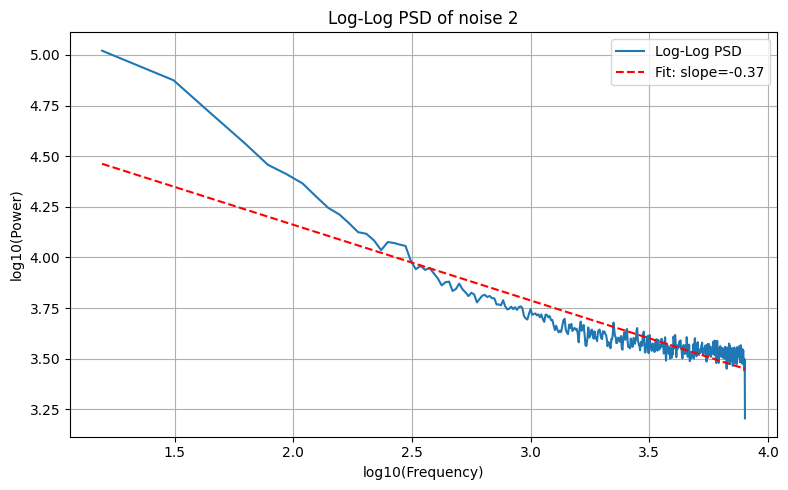

In [4]:
for i in range(3):
    fs, x = wavfile.read(sound_files[i])

    # Compute PSD with Welch method
    f, Pxx = welch(x, fs=fs, nperseg=1024, scaling='density')

    # Remove zero frequency to avoid log(0)
    valid = f > 0
    f = f[valid]
    Pxx = Pxx[valid]

    # Fit a line in log-log scale
    log_f = np.log10(f)
    log_Pxx = np.log10(Pxx)

    slope, intercept = np.polyfit(log_f, log_Pxx, 1)

    # Plot log-log PSD with fitted line
    plt.figure(figsize=(8, 5))
    plt.plot(log_f, log_Pxx, label='Log-Log PSD')
    plt.plot(log_f, slope * log_f + intercept, 'r--', label=f'Fit: slope={slope:.2f}')
    plt.xlabel('log10(Frequency)')
    plt.ylabel('log10(Power)')
    plt.title(f"Log-Log PSD of noise {i}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Noise 1:
- Power is evenly distributed across all frequencies: **White noise**

#### Noise 2:
- Noise with a descending slope = -1 : **Pink noise**

#### Noise 3:
- Noise with parabolic-looking drop, slope ≈ -0.37, flattens at high frequency

**Interpretation:** This appears to be a mixture of noise types:

- A colored low-frequency component (probably pink-ish),
- White noise dominating at higher frequencies

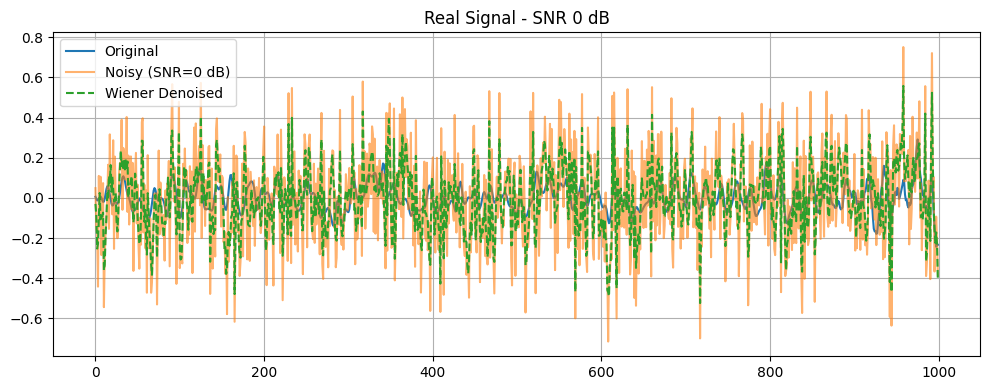

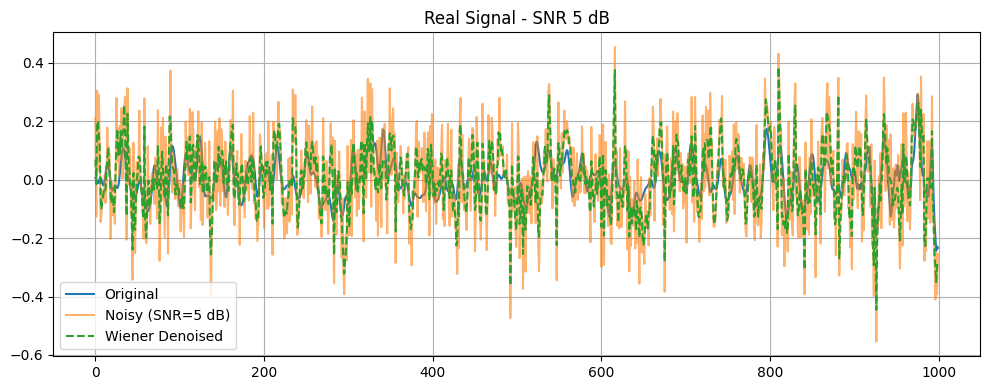

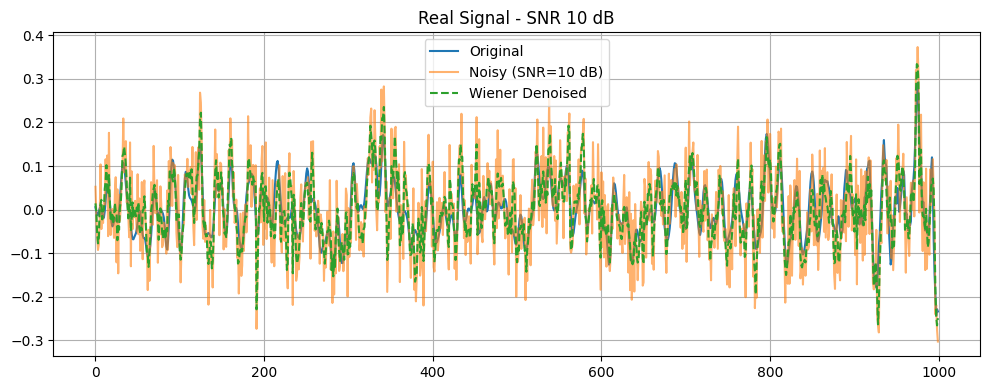

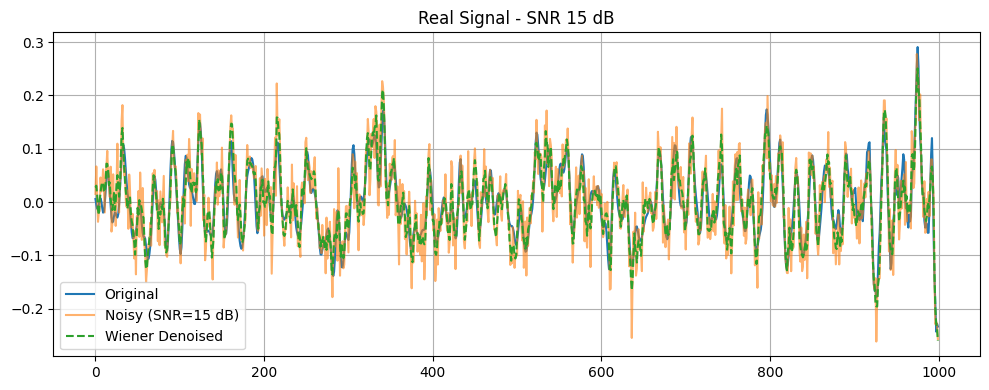

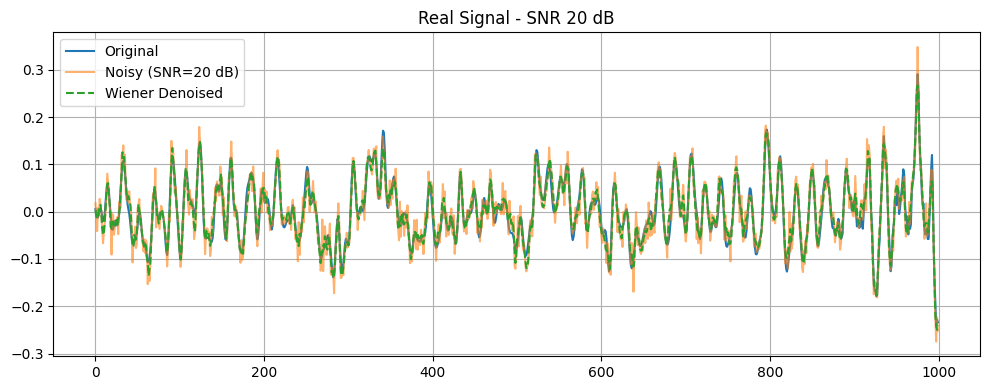

In [5]:
# Load real audio signal
fs, signal_clean = wavfile.read('data/music.wav')  # Replace with your file

# Normalize if necessary
signal_clean = signal_clean / np.max(np.abs(signal_clean))

# Define SNR levels
snr_levels = [0, 5, 10, 15, 20]

# Function to add noise
def add_noise(signal, snr_db):
    signal_power = np.mean(signal**2)
    snr_linear = 10**(snr_db / 10)
    noise_power = signal_power / snr_linear
    noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
    return signal + noise

# Process each SNR level
for snr in snr_levels:
    noisy = add_noise(signal_clean, snr)
    denoised = wiener(noisy)

    # Plot a small segment (first 1000 samples)
    plt.figure(figsize=(10, 4))
    plt.plot(signal_clean[:1000], label='Original')
    plt.plot(noisy[:1000], label=f'Noisy (SNR={snr} dB)', alpha=0.6)
    plt.plot(denoised[:1000], label='Wiener Denoised', linestyle='--')
    plt.title(f'Real Signal - SNR {snr} dB')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()